# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [2]:
import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

/opt/anaconda3/envs/finrobot/lib/python3.10/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_client_cls" in LLMConfigEntry has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/opt/anaconda3/envs/finrobot/lib/python3.10/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_client_cls" in AnthropicLLMConfigEntry has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/opt/anaconda3/envs/finrobot/lib/python3.10/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_client_cls" in BedrockLLMConfigEntry has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/opt/anaconda3/envs/finrobot/lib/python3.10/site-pa

After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [3]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [48]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

In [50]:
company = "META"
fyear = "2024"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on META's 2024 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------
[autogen.oai.client: 05-29 20:50:55] {706} WARNING - Model qwen-turbo-2025-02-11 is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
Expert_Investor (to User_Proxy):

### Working Plan

To generate an annual report for META based on its 2024 10-K report, I will fol

In [49]:
company = "META"
fyear = "2024"

message = dedent(
    f"""
    请基于 {company} 的 {fyear} 年年报（或等效的披露文件），撰写一份年度研究报告，并将其格式化为 PDF。

    请注意以下要求：
    - 在正式开始任务前，请明确说明你的工作计划和步骤；
    - 工具的调用请依次进行，确保每一步逻辑清晰，尤其是涉及用户确认的部分；
    - 所有文件操作都应在 "{work_dir}" 目录下进行；
    - 所有生成的图片需直接展示在对话中；
    - 所有段落合计字数应在 400 到 450 字之间，在满足该要求前请勿生成最终 PDF；
    - 最终输出报告为中文。
    """
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

User_Proxy (to Expert_Investor):


请基于 贵州茅台 的 2024 年年报（或等效的披露文件），撰写一份年度研究报告，并将其格式化为 PDF。

请注意以下要求：
- 在正式开始任务前，请明确说明你的工作计划和步骤；
- 工具的调用请依次进行，确保每一步逻辑清晰，尤其是涉及用户确认的部分；
- 所有文件操作都应在 "../report" 目录下进行；
- 所有生成的图片需直接展示在对话中；
- 所有段落合计字数应在 400 到 450 字之间，在满足该要求前请勿生成最终 PDF；
- 最终输出报告为中文。


--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

### 工作计划与步骤

1. **获取财务数据**：首先，我将使用 `get_sec_report` 工具获取贵州茅台（股票代码：600519）2024年的年报链接及提交日期。
2. **分析关键数据**：通过 `get_key_data` 工具提取年报中的关键财务数据。
3. **生成图表**：利用 `get_pe_eps_performance` 和 `get_share_performance` 工具分别生成PE/EPS表现图以及股价走势对比图。
4. **撰写内容**：借助多个分析工具（如 `analyze_business_highlights`, `analyze_income_stmt` 等），逐步构建年度报告所需的内容框架。
5. **整合信息**：汇总上述所有信息并撰写成一个连贯的段落，确保总字数控制在400至450字之间。
6. **生成PDF**：最后，使用 `build_annual_report` 工具将整理好的内容转化为PDF格式的年度研究报告。

接下来，我将按照以上步骤执行任务。

---

#### 第一步：获取财务数据
***** Suggested tool call (call_a947eb32f84c4674830055): get_sec_report *****
Arguments: 
{"fyear": "2024", "ticker_symbol":

The Rest Cells are optional, simply used to show the generated PDF

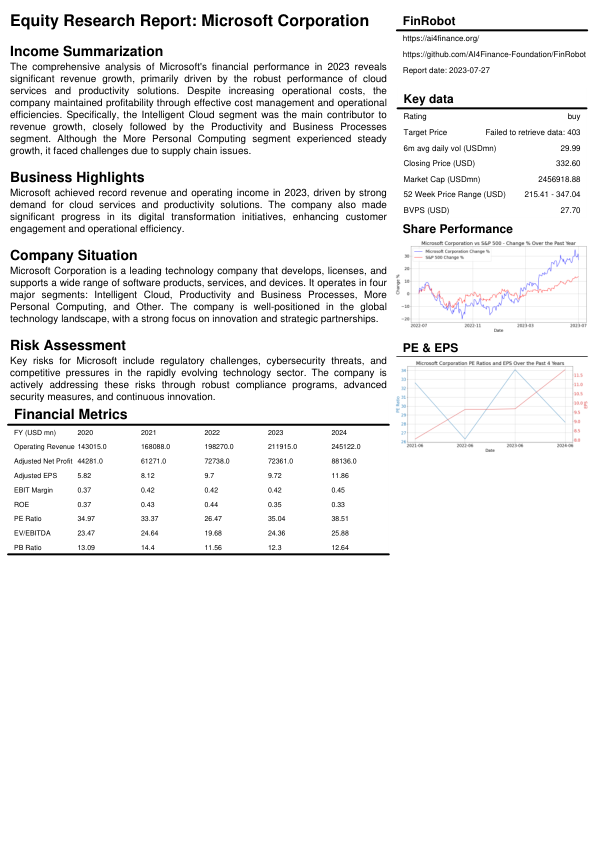

In [12]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/annual_report.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)